# Load repo

In [1]:
import os
!git clone https://github.com/intory89/StyleVC
os.chdir('StyleVC')
os.getcwd()

Cloning into 'StyleVC'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 142 (delta 17), reused 128 (delta 11), pack-reused 0
Receiving objects: 100% (142/142), 24.48 MiB | 26.84 MiB/s, done.
Resolving deltas: 100% (17/17), done.


'/content/StyleVC'

In [2]:
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
!pip install transformers
!pip install jiwer
!pip install praat-parselmouth==0.3.3
!pip install quote
import jiwer

     |████████████████████████████████| 3.5 MB 10.0 MB/s 
     |████████████████████████████████| 6.8 MB 53.8 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 596 kB 37.5 MB/s 
     |████████████████████████████████| 895 kB 56.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 50 kB 7.8 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149853 sha256=1a8b27807f87dd3cda8f80e89633b726f3cae4136b6a8d89475ab0601554a072
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
     |████████████████████████████████| 9.0 MB 26.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quote: filename=quote-2.0.4-py3-none-any.whl size=5004 sha256=4a26f81df5a2cbd2d3e161d7d9a5f81d3d6ea5b7f139f85c17af49468de5b4b5
  Stored in directory: /root/.cache/pip/wheels/74/8c/7d/2670c2479ed9ff454b92c11a0459b9f8dcbc461ede57f8a493
  Created wheel for gazpacho: filename=gazpacho-1.1-py3-none-any.whl size=7481 sha256=a531b16d075cea532266e2388f47e27b83b98c33188dda5e19555102e5bd93ed
  Stored in directory: 

# Load checkpoint

In [3]:
!pip install gdown
import shutil
os.makedirs('vocoder/checkpoint/VCTK_16K_V1')
!gdown --id 161vOpseswWQXrMhYs4TF1EBsHaaSmdoC --output g_01700000      
!gdown --id 1lZsurL1LINIKqHOa0MRb7zqnfeH1kGaQ --output config.json 
shutil.move('g_01700000', 'vocoder/checkpoint/VCTK_16K_V1/') 
shutil.move('config.json', 'vocoder/checkpoint/VCTK_16K_V1/')

Downloading...
From: https://drive.google.com/uc?id=161vOpseswWQXrMhYs4TF1EBsHaaSmdoC
To: /content/StyleVC/g_01700000
100% 55.8M/55.8M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lZsurL1LINIKqHOa0MRb7zqnfeH1kGaQ
To: /content/StyleVC/config.json
100% 758/758 [00:00<00:00, 1.07MB/s]


'vocoder/checkpoint/VCTK_16K_V1/config.json'

In [4]:
os.makedirs('outputs/StyleVC_VCTK')
!gdown --id 1AUZXNIun5TvZB-tLxa5xHAc4Hn0HBnC9 --output checkpoint_G_100000
shutil.move('checkpoint_G_100000', 'outputs/StyleVC_VCTK/')

Downloading...
From: https://drive.google.com/uc?id=1AUZXNIun5TvZB-tLxa5xHAc4Hn0HBnC9
To: /content/StyleVC/checkpoint_G_100000
100% 1.66G/1.66G [00:33<00:00, 50.1MB/s]


'outputs/StyleVC_VCTK/checkpoint_G_100000'

# Load audio

In [5]:
source_path = os.path.join('data/VCTK/original/wav48/p250/p250_019.wav')
Audio(source_path)

In [6]:
target_path = os.path.join('data/VCTK/original/wav48/p334/p334_011.wav')
Audio(target_path)

# Preprocessing

In [7]:
audio_A, _ = librosa.load(source_path, sr=16000)
audio_B, _ = librosa.load(target_path, sr=16000)

In [8]:
# preprocessing parameters
import model.hparams as hp
MAX_WAV_VALUE       = hp.MAX_WAV_VALUE
sampling_rate       = hp.sampling_rate
n_fft               = hp.n_fft
n_mels              = hp.n_mels
hop_size            = hp.hop_size 
win_size            = hp.win_size 
fmin                = hp.fmin         
fmax                = hp.fmax
eps                 = hp.eps
clip_val            = hp.clip_val

log directory! -----> StyleVC_VCTK
seen speakers! 87 unseen speakers! 20


In [9]:
from preprocessing import call_generate_melspec
mel_A, processed_audio = call_generate_melspec(
    audio_A, sampling_rate, MAX_WAV_VALUE, n_fft, n_mels, 
    hop_size, win_size, fmin, fmax, eps, clip_val) # [T, 80], [trimed wav length]

mel_B, processed_audio = call_generate_melspec(
    audio_B, sampling_rate, MAX_WAV_VALUE, n_fft, n_mels, 
    hop_size, win_size, fmin, fmax, eps, clip_val) # [T, 80], [trimed wav length]

/usr/local/lib/python3.7/dist-packages/torch/functional.py:573: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:659.)
  normalized, onesided, return_complex)


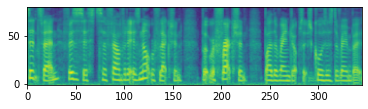

In [10]:
plt.imshow(mel_A.T)
plt.gca().invert_yaxis()

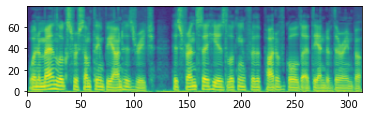

In [11]:
plt.imshow(mel_B.T)
plt.gca().invert_yaxis()

# Load Model

In [12]:
from model.model import Model
import model.hparams as hp
from utils.inference_utils import make_test_pairs, make_experiment_conversion_pair, pad_sequences, load_data
from vocoder.inference_npy import main as run_vocoder
import torch

In [13]:
model = Model(hp).cuda(0)
model.load_state_dict(torch.load('outputs/StyleVC_VCTK/checkpoint_G_100000')['model'])
model.eval()
print("load model!")

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


Downloading:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


load model!


# Inference

In [14]:
mel_A = mel_A.unsqueeze(0).cuda(0) # [1, T, 80]
mel_B = mel_B.unsqueeze(0).cuda(0)

audio_A = audio_A.reshape(1,-1) # [1, wav_len]
audio_B = audio_B.reshape(1,-1)

mel_len_A = torch.LongTensor([mel_A.size(1)]).cuda(0)
mel_len_B = torch.LongTensor([mel_B.size(1)]).cuda(0)

spk_name_A = 'p250'
spk_name_B = 'p334'

In [15]:
mel_outputs = model.inference(audio_A, mel_A, mel_len_A, audio_B, mel_B, mel_len_B)
print(mel_outputs.size())

torch.Size([1, 345, 80])


/content/StyleVC/model/utils.py:148: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  ids = lengths.new_tensor(torch.arange(0, max_len)).to(lengths.get_device()) # .cuda()


In [16]:
# save result
source_mel = mel_A.squeeze(0).float().detach().cpu().numpy().T # [1, T, 80] -> [80, T]
target_mel = mel_B.squeeze(0).float().detach().cpu().numpy().T               
converted_mel = mel_outputs.squeeze(0).float().detach().cpu().numpy().T
path = "p250_to_p334.npy"

# Inference result
os.makedirs('generated/StyleVC_VCTK', exist_ok=True)
np.save(os.path.join('generated/StyleVC_VCTK', path), converted_mel)

# Vocoder

In [17]:
run_vocoder(hp, path=os.path.join('../generated/StyleVC_VCTK'))

Initializing Inference Process..
[*] Load checkpoint path: vocoder/checkpoint/VCTK_16K_V1/g_01700000
Loading 'vocoder/checkpoint/VCTK_16K_V1/g_01700000'
Complete.
Removing weight norm...
generated/../generated/StyleVC_VCTK/p250_to_p334.wav


# Inference result
## Source speech(Slow speaking speaker)

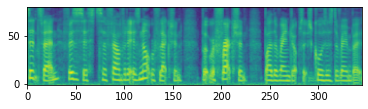

In [18]:
target_path = os.path.join('data/VCTK/original/wav48/p250/p250_019.wav')
plt.imshow(mel_A.squeeze(0).cpu().T)
plt.gca().invert_yaxis()
Audio(target_path)

## Target speech(Fast speaking speaker)

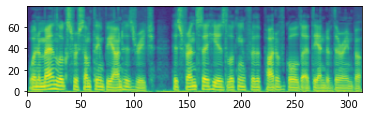

In [19]:
source_path = os.path.join('data/VCTK/original/wav48/p334/p334_011.wav')
plt.imshow(mel_B.squeeze(0).cpu().T)
plt.gca().invert_yaxis()
Audio(source_path)

## Generated speech

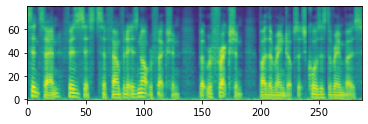

In [20]:
generated_path = os.path.join('generated/StyleVC_VCTK/p250_to_p334.wav')
generated_audio, _ = librosa.load(generated_path, sr=16000)
mel_A2B, processed_audio = call_generate_melspec(
    generated_audio, sampling_rate, MAX_WAV_VALUE, n_fft, n_mels, 
    hop_size, win_size, fmin, fmax, eps, clip_val) # [T, 80], [trimed wav length]
plt.imshow(mel_A2B.T)
plt.gca().invert_yaxis()
Audio(generated_path)

# Thank you for your attention!